# step4: 簡単な常微分方程式を解く

## 1次の陽的オイラー法

一階の常微分方程式

$$
\frac{dx}{dt} = f(x) \tag{1}
$$
を考える．

時刻$t$での解$x(t)$が与えられているして，微小時間$h$後の解$x(t+h)$はテイラー展開
$$
x(t+h) = x(t) + h \frac{dx(t)}{dt}\ + \mathcal{O}(h^2) 
$$
によって与えられる．$x(t)=x_n$から時刻 $x(t+h)=x_{n+1}$ とおき，$h$の一次のオーダーで打ち切ると

$$
x_{n+1} = x_n + h f(x_n)\tag{2}
$$

として与えられる．右辺が時刻$t=n$のみで決まるため1次の陽的解法であり，特に(2)は陽的オイラー法と呼ばれる．
数値解は(2)式の反復によって得られる．


### 例題

#### １階の微分方程式 (準備中)

$$
\frac{dx}{dt}=f(x)
$$

を解く．

#### 2階の微分方程式

重りの質量を$m$，の自然長からの変位を$q$，バネ定数を$k$とするとニュートンの運動方程式は
$$
m \frac{d^2q}{dt^2} = -kq
$$
である．運動量$p=m\frac{dq}{dt}$を導入すれば，１階の微分方程式系
$$
\frac{dq}{dt} = p,\quad
\frac{dp}{dt} = -\omega^2 q \tag{3}
$$
となる．以下簡単のため為$\omega=\sqrt{\frac{k}{m}}=1$としておく．

陽的オイラー法を(3)式に適用すると
$$
q_{n+1} = q_{n} + h p_{n},\quad
p_{n+1}  = p_{n} -h q_{n}
$$
が得られる．

$x=(q, p)$としてオイラー法は次の様に定義しよう．

In [1]:
import numpy as np

def ExplicitEular(x ,h):
    qq = x[0] + x[1] * h
    pp = x[1] - x[0] * h
    return np.array([qq, pp])

初期条件$x_0$，$h$，反復回数を定める．

In [2]:
x0 = np.array([1,0])
h = 0.1
itermax = 5

数値解を求める

In [3]:
x = x0.copy()
for i in range(itermax):
    t = 0 + i * h
    print(i, x)
    x = ExplicitEular(x, h)

0 [1 0]
1 [ 1.  -0.1]
2 [ 0.99 -0.2 ]
3 [ 0.97  -0.299]
4 [ 0.9401 -0.396 ]


数値だけ見ていてもよくわからないので得られたデータをグラフにする．

In [4]:
import matplotlib.pyplot as plt

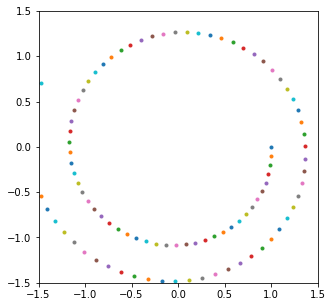

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
x = x0.copy()
itermax = 100
for i in range(itermax):
    ax.plot(x[0], x[1], '.')
    x = ExplicitEular(x, h)
ax.set_xlim(-1.5,1.5) # x軸の幅
ax.set_ylim(-1.5,1.5) # y軸の幅
plt.show() # グラフを表示

この方法では，計算しながら描画するため時間が掛かる．そのため時系列を一つの配列に格納して描画したほうが早く計算が終わる．

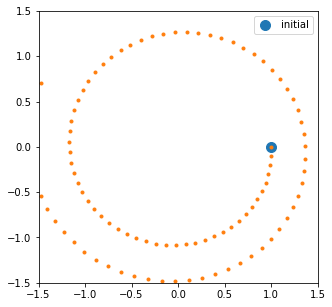

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
x = x0.copy()
traj = [np.array([]), np.array([])]
ax.plot(x[0],x[1], 'o' ,markersize=10, label="initial")
for i in range(itermax):
    traj[0] = np.append(traj[0], x[0])
    traj[1] = np.append(traj[1], x[1])    
    x = ExplicitEular(x, h)

ax.plot(traj[0], traj[1], '.')
ax.legend(loc = 1)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()

**Note:** 

調和振動子の解曲線はエネルギー保存の為閉曲線をなすが，数値解は軌道が螺旋を描いて無限遠へ飛び去る．
これはバグではなく，陽的オイラー法の正しい挙動である．


## 1次の陰的オイラー法

(1)の微分方程式に対して，
時刻$t$での解$x(t)$が与えられているして，微小時間$h$だけ前の解を$x(t-h)$としてテイラー展開すれば

$$
x(t)= x(t-h) + h\frac{dx(t)}{dt} + \mathcal{O}(h^2)
$$
が得られる．$x(t-h)=x_n$，$x(t)=x_{n+1}$として
$$
x_{n+1} = x_n + h f(x_{n+1})\tag{4}
$$
となる．右辺に$x_{n+1}$が有るため一般に方程式は陽に解くことは出来ない．そのため陰的解法と呼ばれ，特に(4)は陰的オイラー法と呼ばれる

### 例題

調和振動子の場合，陰的オイラー法はexplicitに解くことがでる．(4)を適用すると

$$
q_{n+1} = q_{n} + h p_{n+1}, \quad
p_{n+1}  = p_{n} + h q_{n+1}
$$

であり左の式を右の式に代入すると

$$
p_{n+1} = (p_{n} - hq_n)/(1+h^2),\quad
q_{n+1} = q_n + h p_{n+1}
$$

が得られ，故に陽に解くことができる．

In [7]:
import numpy as np

def ImplicitEular(x, h):
    pp = (x[1] - h * x[0]) /(1 + h ** 2)
    qq = x[0] + h*pp
    return np.array([qq, pp])

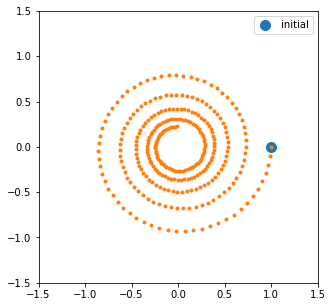

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
x = x0.copy()
itermax=300
traj = [np.array([]), np.array([])]
ax.plot(x[0], x[1], 'o' ,markersize=10, label="initial")
for i in range(itermax):
    traj[0] = np.append(traj[0], x[0])
    traj[1] = np.append(traj[1], x[1])    
    x = ImplicitEular(x, h)

ax.plot(traj[0], traj[1], '.')
ax.legend(loc = 1)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()

**Note:**

陽的オイラー法では軌道は無限遠へ飛び去ったが，陰的オイラー法では軌道は原点に向かって落ちてゆく．数値積分法が摩擦を生んでいるのである．

## 1次のsymplectic integrator

$p$ に対して陽的オイラー法，$q$について陰的オイラー法を適用する（逆でも構わない）と，

$$
p_{n+1}  = p_{n} - h q_n,\quad
q_{n+1}  = q_{n} + h p_{n+1}
$$

である．この解法はシンプレクティック オイラー法と呼ばれる

In [9]:
import numpy as np

def SymplecticEular(x, h):
    qq = x[0] + x[1] * h
    pp = x[1] - qq * h
    return [qq, pp]

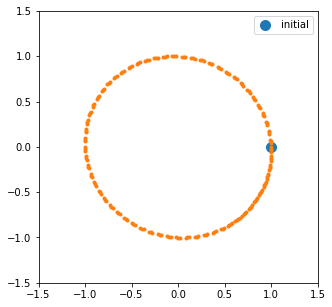

In [10]:
alignfig, ax = plt.subplots(1,1,figsize=(5,5))
x = x0.copy()
itermax = 200
traj = [np.array([]), np.array([])]
ax.plot(x[0],x[1], 'o' ,markersize=10, label="initial")
for i in range(itermax):
    traj[0] = np.append(traj[0],x[0])
    traj[1] = np.append(traj[1],x[1])    
    x = SymplecticEular(x, h)

ax.plot(traj[0], traj[1], '.')
ax.legend(loc=1)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()

**Note:**

$h\gt2$や$h=1$といった特別な場合を除き，シンプレクティック オイラー法による調和振動子系の数値解は閉曲線を稠密に埋める．
その理由の一つとして，シンプレクティック法はシンプレクティック形式を保存，すなわち

\begin{equation}
dp_{n+1}\wedge dq_{n+1} = dp_{n}\wedge dq_{n}
\end{equation}

が成立しているからである．ただし，シンプレクティック形式を保存していれば閉曲線が得られるとは限られず，一般のハミルトン系ではカオス運動の出現に悩まされる事になる．

陽的解法や陰的解法で軌道が発散したりある値に収束したりする理由はヤコビ行列式が1ではないためであるが，その大きさは互いに逆数の関係にある．
故に，ハミルトニアン$H(q,p)$に対して陽的解法と陰的解法を組み合わせることでシンプレクティック形式を保存する数値積分法を一般に構成できる．
一般に陽的に構成できるとは限らないが，ハミルトニアンが$H(q,p) = T(p) + V(q)$のように分離されている場合は，陽に任意の次数の数値積分法を構成することができる．

解くべき微分方程式が持つ保存量や対称性が，数値積分法でも保存されているということは一般にありえない．
故にシンプレクティック積分法のように，方程式がもつ対称性や保存量が保存する数値積分法を開発することは極めて重要な課題である.
ハミルトン系で重要な性質は，全エネルギーならびにシンプレクティック形式$dp\wedge dq$の保存である．
故に$H=const$，$dp\wedge dq =const$を満たす数値積分法の開発が期待されるが，一般のハミルトン系(非可積分系)ではそのような数値積分法は存在しないことが指摘されている$^1$．(このステイトメントは2から引用したものであり原典は確認していない．)

私はこの周辺に詳しくないが，Hairer$^3$らは数値積分法が保存する構造を議論し，Backward error analysis という考え方を用いた手法で数値解の意味づけが行われいる．2,3の文献は非常に教育的であり強くお勧めする．

1. Z. Ge, and J. E. Marsden, "Lie-poisson Hamilton-Jacobitheory and Lie,Polsson integrators" Phys. Lett. A 133,134-139 (1988)
2. 吉田春夫, [ハミルトン力学系のためのシンプレクティック数値解法](http://jglobal.jst.go.jp/public/20090422/200902156128764714) (1999)
3. E. Hairer, C. Lubich, G. Wanner, "Geometric Numerical Integration" Springer (2006)

**todo:**

高階のintegratorの実装